# RDkitで分子を操作する

## ライブラリをインポートする

> **importとは？**: ライブラリを使えるようにするおまじないのことです. Pythonでは基本的にゼロから全てのプログラムを作ることはしません. 実際は, ある程度まとまった便利な処理を少ないコードで実行できる「ライブラリ」というものを使用することで開発効率を上げていきます.  
>
> 注😠) **ライブラリ**(もしくはパッケージともいう)とは便利な処理をまとめたプログラムファイルのことを指します

In [1]:
import urllib.request as req # ネットからデータをダウンロードするときに使うライブラリ
import pandas as pd # テーブルデータの処理に使うライブラリ
from rdkit import Chem # 分子をPythonで扱うときに必要なライブラリ
from rdkit.Chem import Draw # 分子を画像として描写するときに必要なライブラリ

## Solubirity data をダウンロードしてCSVファイルとして保存する

In [5]:
url = 'http://modem.ucsd.edu/adme/data/databases/logS/data_set.dat'
req.urlretrieve(url, 'water_solubility.txt') 

('water_solubility.txt', <http.client.HTTPMessage at 0x7fb10b981850>)

In [21]:
df = pd.read_csv('water_solubility.txt', sep='\t', header=None)
df.columns = ['SMILES', 'ID', 'logS']
df.to_csv('water_solubility.csv', index=False)

## 保存したCSVファイルを読み込む

In [3]:
# Pandas と呼ばれるライブラリを使って, CSVファイルをPythonプログラムに読み込ませる
df = pd.read_csv('water_solubility.csv')
df

,SMILES,ID,logS
0,O=C(C)N,60-35-5,1.58
1,NNC,60-34-4,1.34
2,O=C(C)O,64-19-7,1.22
3,N1CCCC1,123-75-1,1.15
4,O=C(N)NO,127-07-1,1.12
...,...,...,...
1285,Clc1c(c2c(ccc(Cl)c2Cl)Cl)c(ccc1Cl)Cl,38411-22-2,-8.65
1286,c1c2c(ccc3c2cccc3)cc2c1ccc1ccccc12,53-70-3,-8.66
1287,c1c2c3cccc4ccc5ccc6c(c2c(cc6)cc1)c5c43,191-24-2,-9.03
1288,Clc1c(Cl)c(c2cc(c(c(Cl)c2Cl)Cl)Cl)c(c(c1Cl)Cl)Cl,40186-72-9,-10.26


## SMILESから分子を描写する

In [5]:
# テーブルデータのSMILESの列を抜き出して, 「リスト型」に変換する
smiles = df['SMILES'].tolist()
smiles

['O=C(C)N',
 'NNC',
 'O=C(C)O',
 'N1CCCC1',
 'O=C(N)NO',
 'OCC(O)CO',
 'O=C(C)N(C)C',
 '[nH0]1cccc[nH0]1',
 '[nH0]1ccc[nH0]c1',
 'OCC(C(C(C(CO)O)O)O)O',
 'O=C(CC(C)N)O',
 'N1CCNCC1',
 'N1CCCCC1',
 'c1c(O)cc[nH0]c1',
 'c1c(O)[nH0]ccc1',
 'O=C(O)CCCC(O)=O',
 'C1N(C)CCOC1',
 'O=C(N)OC',
 'CN1C(=O)C=CC=C1',
 'O=C(O)CCl',
 'O=C(N)OCC',
 'COC(=O)C1=CCCN(C)C1',
 'c1c(O)cc(cc1)O',
 'c1cc[nH0]cc1',
 'N1CCNCC1C',
 'OCC1(C(C(C(CO1)O)O)O)O',
 'c1c(O)c(O)ccc1',
 'O=C(N)c1ccc[nH0]c1',
 'C=1C(=O)NC=NC1',
 'O=CCC',
 'O=COC',
 'O=CC=C',
 'C1CCCO1',
 'O=C(C)CC',
 'C1C(C)NCC(C)N1',
 'COCOC',
 'c1c(C)[nH0]c(cc1)C',
 'c1c(C)ccc(C)[nH0]1',
 'OC1C(COC(C1O)O)O',
 'c1c(C)cc(C)[nH0]c1',
 'Cc1c(C)ccc[nH0]1',
 'C1=CC=C2C3CC(CNC3)CN2C1=O',
 'OC1C(O)C(C(C(C1O)O)O)O',
 'O=CC=CC',
 'NC(CC)C(O)=O',
 'O=C1CCC(=O)N1',
 'O=C(C(C)C)O',
 'C1N(C)CCCC1',
 'O=C(C)CC(C)=O',
 'O=COCC',
 'N#CC=C',
 'O1CCCC1C',
 'O=C(OC(C)(C)C)N',
 'CC(CC)(C)O',
 'c1c(NN)cccc1',
 'OCC(C)C',
 '[O-][S+2]([O-])(CC)CC',
 'c1c2c([nH0]cc[nH0]2)[nH0]c[n

In [6]:
# smilesの中身は番号を指定することで参照できる
# Pythonでは１番目に0の番号が割り当てられていることに注意する
smiles[0]

'O=C(C)N'

In [7]:
# smilesリストの0番目の値は文字列(str型)
type(smiles[0])

str

In [8]:
### 「リスト」に関する解説 ###
# []で括ったものを「リスト」という
# リストは値をしまっておくための箱のことを指す
# hoge[0]みたいに番号を指定すると中身を取り出せる
hoge = ['a', 'b', 'c']
print(type(hoge))
hoge

<class 'list'>


['a', 'b', 'c']

In [38]:
hoge[1]

'b'

In [9]:
# リストは入れ替え可能な箱
# リストの0番目に「1」を代入すると, リストの中身が置き換わる
hoge[0] = 1
hoge

[1, 'b', 'c']

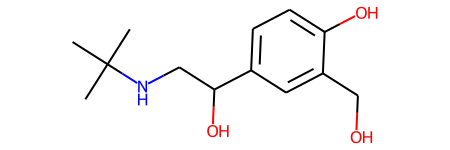

In [10]:
# 同じ要領でsmilesの199番目のmolを描写してみる
mol = Chem.MolFromSmiles(smiles[199])
mol

## SMIELSを一括で全てmolに変換する

In [13]:
### for 文の基本的な使い方 ###
# 1. for 変数名 in リスト: 
#   で, リストの中身を１つずつ取り出して, それを指定した変数名に代入することができる
# 2. for文の中身は、それがfor文内の処理であることがわかるように, インデント(空白)を必要とすることに注意←Tabボタンを押せばOK
###########################

mols = [] # Point 1: 空の箱(空のリスト)をまず用意する
for s in smiles: # Point 2: smilesというリストから要素を１つづつ取り出して, それを　s　という変数名で扱う
    mol = Chem.MolFromSmiles(s) # sの情報に基づいて mol を生成する
    mols.append(mol) # Point 3: 先に作ったmolsという空のリストにmolを１つずつ格納する
    # ここまで終わったら次の値をsmilesのリストから拾ってsに代入する処理が行われる

RDKit WARNING: [19:23:28] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:23:28] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:23:28] WARNING: not removing hydrogen atom without neighbors
RDKit ERROR: [19:23:28] Explicit valence for atom # 6 O, 3, is greater than permitted
[19:23:28] WARNING: not removing hydrogen atom without neighbors
[19:23:28] WARNING: not removing hydrogen atom without neighbors
[19:23:28] WARNING: not removing hydrogen atom without neighbors
[19:23:28] Explicit valence for atom # 6 O, 3, is greater than permitted


In [14]:
hoge = [1,2,3,4,5]
hoge

[1, 2, 3, 4, 5]

In [15]:
hoge[0]

1

In [16]:
hoge[:2]

[1, 2]

In [82]:
hoge[1:3]

[2, 3]

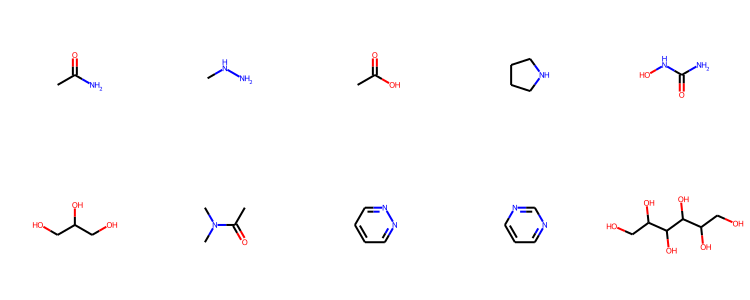

In [90]:
Draw.MolsToGridImage(mols[:10], molsPerRow=5, subImgSize=(150,150))